In [1]:
library(tidyverse)
library(sf)
library(tidycensus)
library(redist)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1



In [6]:
census_api_key(Sys.getenv("CENSUS_API_KEY"))

acs <-
  get_acs(
    geography = "block group",
    state = "VA",
    year = 2015,
    variables = "B01003_001", #total population, see https://api.census.gov/data/2015/acs/acs5/variables.html
    geometry = TRUE
  )

To install your API key for use in future sessions, run this function with `install = TRUE`.

Getting data from the 2011-2015 5-year ACS




  |======================================================================| 100%


Fetching block group data by county and combining the result.



Downloading: 2.7 MB       

In [8]:
acs

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

GEOID,NAME,variable,estimate,moe,geometry
<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
510790302004,"Block Group 4, Census Tract 302, Greene County, Virginia",B01003_001,3600,499,MULTIPOLYGON (((-78.43772 3...
510790302001,"Block Group 1, Census Tract 302, Greene County, Virginia",B01003_001,2592,417,MULTIPOLYGON (((-78.39661 3...
510790301023,"Block Group 3, Census Tract 301.02, Greene County, Virginia",B01003_001,1754,395,MULTIPOLYGON (((-78.44737 3...
510790301011,"Block Group 1, Census Tract 301.01, Greene County, Virginia",B01003_001,1780,246,MULTIPOLYGON (((-78.54367 3...
510790302002,"Block Group 2, Census Tract 302, Greene County, Virginia",B01003_001,1646,436,MULTIPOLYGON (((-78.48606 3...
510790301022,"Block Group 2, Census Tract 301.02, Greene County, Virginia",B01003_001,673,230,MULTIPOLYGON (((-78.45523 3...
510790301024,"Block Group 4, Census Tract 301.02, Greene County, Virginia",B01003_001,1411,408,MULTIPOLYGON (((-78.53771 3...
510790302003,"Block Group 3, Census Tract 302, Greene County, Virginia",B01003_001,1706,420,MULTIPOLYGON (((-78.39918 3...
510790301012,"Block Group 2, Census Tract 301.01, Greene County, Virginia",B01003_001,2046,334,MULTIPOLYGON (((-78.45466 3...


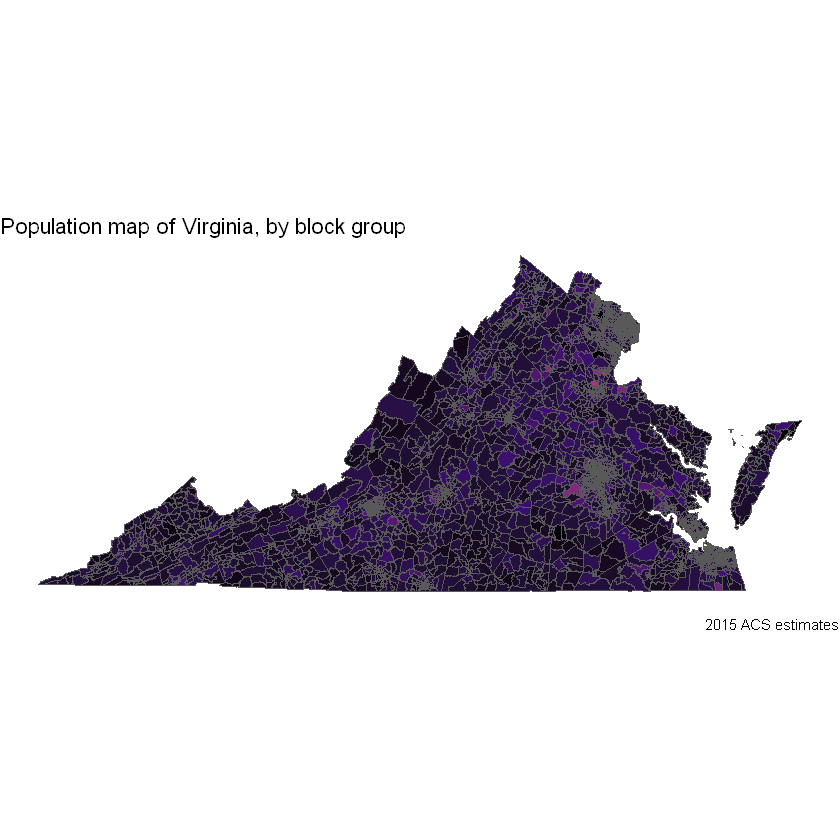

In [9]:
acs %>% 
  ggplot(aes(fill = estimate)) + 
  geom_sf(size = 0, show.legend = FALSE) + 
  scale_fill_viridis_c(option = "magma") + 
  coord_sf(datum = NA) +
  theme_void() + 
  labs(title = "Population map of Virginia, by block group", caption = "2015 ACS estimates")

This is all well and good, but I need to know the 2011-2020 congressional districts so that I can run MCMC using them as seeds. 

In [13]:
va_precinct = "C:/Users/madie/OneDrive/data/vest/va_2018_ushouse/va_2018_ushouse.shp"
df_p = st_read(va_precinct)

Reading layer `va_2018_ushouse' from data source `C:\Users\madie\OneDrive\data\vest\va_2018_ushouse\va_2018_ushouse.shp' using driver `ESRI Shapefile'
Simple feature collection with 2463 features and 9 fields
geometry type:  MULTIPOLYGON
dimension:      XYZ
bbox:           xmin: -83.67539 ymin: 36.54085 xmax: -75.16643 ymax: 39.46601
z_range:        zmin: 0 zmax: 0
geographic CRS: NAD83


In [14]:
df_p

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
001,Accomack County,000101,Chincoteague,2,533,1039,0,1,MULTIPOLYGON Z (((-75.42507...
001,Accomack County,000201,Atlantic,2,171,482,0,2,MULTIPOLYGON Z (((-75.59978...
001,Accomack County,000202,Greenbackville,2,307,595,0,1,MULTIPOLYGON Z (((-75.49919...
001,Accomack County,000301,New Church,2,583,490,0,0,MULTIPOLYGON Z (((-75.64987...
001,Accomack County,000401,Bloxom,2,118,286,0,0,MULTIPOLYGON Z (((-75.71556...
001,Accomack County,000402,Parksley,2,242,418,0,1,MULTIPOLYGON Z (((-75.7718 ...
001,Accomack County,000403,Saxis,2,39,130,0,0,MULTIPOLYGON Z (((-75.80121...
001,Accomack County,000501,Mappsville,2,330,214,0,0,MULTIPOLYGON Z (((-75.6279 ...
001,Accomack County,000502,Rue,2,351,115,0,0,MULTIPOLYGON Z (((-75.67069...


In [15]:
pop <-
  get_acs(
    geography = "block group",
    state = "VA",
    year = 2018,
    variables = "B01003_001", #total population, see https://api.census.gov/data/2015/acs/acs5/variables.html
    geometry = TRUE
  )
options(tigris_use_cache = TRUE)

Getting data from the 2014-2018 5-year ACS




  |======================================================================| 100%


Fetching block group data by county and combining the result.



Downloading: 2.7 MB     